In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import bs4
import urllib
import urllib.request
import time
from bs4 import BeautifulSoup
import lxml
import html5lib
import requests
import warnings
import json
import pandas as pd
import datetime

In [6]:
warnings.filterwarnings('ignore')

chrome_options = Options()
# chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(executable_path='chromedriver_88.exe', options=chrome_options)

url = f'https://www.dautos.pe/anuncios.php?Vehiculo=02'
driver.get(url)

In [3]:
cars_dautos = {
    'AUTOPARTES':1,
    'BUS':14,
    'CAMION':15,
    'COUPE':5,
    'HATCHBACK':6,
    'MAQUINARIA':17,
    'MICROBUS':13,
    'MINIVAN':12,
    'MOTO':4,
    'OTROS':3,
    'PICKUP':11,
    'REMOLCADOR':16,
    'RUTA':2,
    'SEDAN':7,
    'STATIONWAGON':9,
    'SUV':10    
    }

In [120]:
n_pages

1

In [123]:
autos = {}
for car_type in cars_dautos:
    url = f"https://www.dautos.pe/anuncios.php?Vehiculo={cars_dautos[car_type]}"
    driver.get(url)
    print(car_type)
    time.sleep(5)
    
    elements = driver.find_elements_by_css_selector('div.agile_top_brand_left_grid')
    dict_autos = {}
    for elmnt in elements:
        try:
            features = {}
            features['marca_mod_anho'] = elmnt.find_element_by_css_selector('p').text
            features['precio'] = elmnt.find_element_by_css_selector('h4').text
            features['link_img_auto'] = elmnt.find_element_by_css_selector('img').get_attribute('src')
            features['link_ad'] = elmnt.find_element_by_css_selector('a').get_attribute('href')
            ad_id = features['link_ad'].split('n=')[1]
            dict_autos[ad_id] = features
        except:
            pass
    autos[car_type] = dict_autos

AUTOPARTES
BUS
CAMION
COUPE
HATCHBACK
MAQUINARIA
MICROBUS
MINIVAN
MOTO
OTROS
PICKUP
REMOLCADOR
RUTA
SEDAN
STATIONWAGON
SUV


In [130]:
autos_2 = {}
for car_type in cars_dautos:
    url = f"https://www.dautos.pe/anuncios.php?Vehiculo={cars_dautos[car_type]}"
    driver.get(url)
    print(f'Iniciando:....{car_type}')
    time.sleep(5)

    total_cars = int(driver.find_element_by_css_selector('div.col-md-12').find_element_by_css_selector('strong').text)
    n_pages = total_cars // 24 
    n_pages = min(n_pages, 5)
    
    for page in range(n_pages+1):
        url = f"https://www.dautos.pe/anuncios.php?Vehiculo={cars_dautos[car_type]}&pag={page}"
        driver.get(url)
        time.sleep(5)
        print(f'{car_type}\t pág:{page}')
        
        elements = driver.find_elements_by_css_selector('div.agile_top_brand_left_grid')
        dict_autos = {}
        for elmnt in elements:
            try:
                features = {}
                features['marca_mod_anho'] = elmnt.find_element_by_css_selector('p').text
                features['precio'] = elmnt.find_element_by_css_selector('h4').text
                features['link_img_auto'] = elmnt.find_element_by_css_selector('img').get_attribute('src')
                features['link_ad'] = elmnt.find_element_by_css_selector('a').get_attribute('href')
                ad_id = features['link_ad'].split('n=')[1]
                dict_autos[ad_id] = features
            except:
                pass
        autos_2[car_type] = dict_autos

Iniciando:....AUTOPARTES
AUTOPARTES	 pág:0
Iniciando:....BUS
BUS	 pág:0
BUS	 pág:1
BUS	 pág:2
BUS	 pág:3
BUS	 pág:4
BUS	 pág:5
Iniciando:....CAMION
CAMION	 pág:0
CAMION	 pág:1
CAMION	 pág:2
CAMION	 pág:3
CAMION	 pág:4
CAMION	 pág:5
Iniciando:....COUPE
COUPE	 pág:0
COUPE	 pág:1
Iniciando:....HATCHBACK
HATCHBACK	 pág:0
HATCHBACK	 pág:1
HATCHBACK	 pág:2
HATCHBACK	 pág:3
HATCHBACK	 pág:4
HATCHBACK	 pág:5
Iniciando:....MAQUINARIA
MAQUINARIA	 pág:0
MAQUINARIA	 pág:1
Iniciando:....MICROBUS
MICROBUS	 pág:0
MICROBUS	 pág:1
MICROBUS	 pág:2
MICROBUS	 pág:3
MICROBUS	 pág:4
MICROBUS	 pág:5
Iniciando:....MINIVAN
MINIVAN	 pág:0
MINIVAN	 pág:1
MINIVAN	 pág:2
MINIVAN	 pág:3
MINIVAN	 pág:4
MINIVAN	 pág:5
Iniciando:....MOTO
MOTO	 pág:0
Iniciando:....OTROS
OTROS	 pág:0
OTROS	 pág:1
OTROS	 pág:2
Iniciando:....PICKUP
PICKUP	 pág:0
PICKUP	 pág:1
PICKUP	 pág:2
PICKUP	 pág:3
PICKUP	 pág:4
PICKUP	 pág:5
Iniciando:....REMOLCADOR
REMOLCADOR	 pág:0
Iniciando:....RUTA
RUTA	 pág:0
Iniciando:....SEDAN
SEDAN	 pág:0
SE

In [146]:
with open(f'dautos_clases_veh.json', 'w') as fp:
    json.dump(autos_2, fp)

In [15]:
for clase_veh in autos_2:
    print(clase_veh)
    print(datetime.datetime.now())
    print('\n')
    for lote in autos_2[clase_veh]:
        features = autos_2[clase_veh][lote]
        url_ad = features['link_ad']
        driver.get(url_ad)
        time.sleep(5)
        
        imgs = driver.find_element_by_css_selector('ol.flex-control-nav').find_elements_by_css_selector('img')
        n_imgs = len(imgs)
        imgs_detalle = [x.get_attribute('src') for x in imgs]
        
        features['n_imgs_detalle'] = n_imgs
        features['imgs_detalle'] = imgs_detalle
        autos_2[clase_veh][lote] = features

AUTOPARTES
2021-02-24 14:38:42.342918


BUS
2021-02-24 14:40:10.657102


CAMION
2021-02-24 14:44:31.137675


COUPE
2021-02-24 14:48:09.449161


HATCHBACK
2021-02-24 14:50:15.507249


MAQUINARIA
2021-02-24 14:54:56.553199


MICROBUS
2021-02-24 14:57:21.354987


MINIVAN
2021-02-24 15:01:06.947672


MOTO
2021-02-24 15:04:52.988520


OTROS
2021-02-24 15:05:46.492303


PICKUP
2021-02-24 15:07:17.842652


REMOLCADOR
2021-02-24 15:11:15.981831


RUTA
2021-02-24 15:11:49.129980


SEDAN
2021-02-24 15:11:55.474475


STATIONWAGON
2021-02-24 15:16:45.766133


SUV
2021-02-24 15:21:18.158725




In [22]:
with open(f'../metadata/dautos_clases_veh.json', 'w') as fp:
    json.dump(autos_2, fp)

In [33]:
autos_3 = {}
for clase in autos_2:
    imgs = []
    for lote in autos_2[clase]:
        if autos_2[clase][lote]['n_imgs_detalle'] == 0:
            imgs.append([autos_2[clase][lote]['link_img_auto']])
        else:
            imgs.append(autos_2[clase][lote]['imgs_detalle'])
#             for link_img in autos_2[clase][lote]['imgs_detalle']:
#                 imgs.append(link_img)
    autos_3[clase] = imgs

In [35]:
with open(f'../metadata/dautos_clases_veh_por_grupos.json', 'w') as fp:
    json.dump(autos_3, fp)

In [16]:
autos_recovered = {'AUTOPARTES': {'79197': {'marca_mod_anho': 'FIRESTONE SHOCK FORTIFIED',
   'precio': 'S/. 5800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly79197-2022021-17824-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20FIRESTONE%20SHOCK%20FORTIFIED&amp;n=79197',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly79197-2022021-17824-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly79197-2022021-17824-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly79197-2022021-17824-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly79197-2022021-17824-pbFoto4.jpg']},
  '78329': {'marca_mod_anho': 'POR OCASION VENDO LLANTAS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly78329-2312021-181025-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20OCASION%20VENDO%20LLANTAS&amp;n=78329',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly78329-2312021-181025-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly78329-2312021-181025-pbFoto2.jpg']},
  '78087': {'marca_mod_anho': 'LLANTAS NUEVAS BRIDGESTONE Y CONTINENTAL',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly78087-1612021-115950-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20LLANTAS%20NUEVAS%20BRIDGESTONE%20Y%20CONTINENTAL&amp;n=78087',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76832': {'marca_mod_anho': 'POR OCASION VENDO LLANTAS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot76832-5122020-224234-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20OCASION%20VENDO%20LLANTAS&amp;n=76832',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot76832-5122020-224234-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot76832-5122020-224234-pbFoto2.jpg']},
  '75466': {'marca_mod_anho': 'POR OCASION VENDO LLANTAS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75466-17102020-182956-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20OCASION%20VENDO%20LLANTAS&amp;n=75466',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75466-17102020-182956-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75466-17102020-182956-pbFoto2.jpg']},
  '75311': {'marca_mod_anho': 'VENDO TORNO DE 1M DE BANCADA',
   'precio': 'S/. 6500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75311-17102020-114656-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20VENDO%20TORNO%20DE%201M%20DE%20BANCADA&amp;n=75311',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75041': {'marca_mod_anho': 'VENDO LLANTAS MARCA BRIDGESTONE',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY75041-10102020-183654-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20VENDO%20LLANTAS%20MARCA%20BRIDGESTONE%20%20&amp;n=75041',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75054': {'marca_mod_anho': 'BUSCO CABINA DE MITSUBISHI FUSO 2008',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75054-10102020-121912-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?BUSCO%20CABINA%20DE%20MITSUBISHI%20FUSO%202008&amp;n=75054',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74848': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly74848-2102020-151920-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=74848',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74909': {'marca_mod_anho': 'POR OCASION VENDO LLANTAS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74909-3102020-174640-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20OCASION%20VENDO%20LLANTAS&amp;n=74909',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot74909-3102020-174640-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot74909-3102020-174640-pbFoto2.jpg']},
  '74646': {'marca_mod_anho': 'POR OCASION VENDO LLANTAS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly74646-2892020-10845-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20OCASION%20VENDO%20LLANTAS&amp;n=74646',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly74646-2892020-10845-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly74646-2892020-10845-pbFoto2.jpg']}},
 'BUS': {'77313': {'marca_mod_anho': 'MITSUBISHI FUSO ROSA 2016',
   'precio': '$ 57000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77313-19122020-164554-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%20ROSA%202016&amp;n=77313',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77326': {'marca_mod_anho': 'MITSUBISHI MF100 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77326-19122020-17333-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20MF100%202014&amp;n=77326',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77328': {'marca_mod_anho': 'MITSUBISHI MF100 2011',
   'precio': '$ 30000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77328-19122020-17429-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20MF100%202011&amp;n=77328',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77328-19122020-17429-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77328-19122020-17429-pbFoto2.jpg']},
  '77485': {'marca_mod_anho': 'MITSUBISHI FUSO ROSA 1997',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia77485-19122020-201912-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%20ROSA%201997&amp;n=77485',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77297': {'marca_mod_anho': 'HINO 500 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77297-19122020-165215-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HINO%20500%202012%20MOD%202013&amp;n=77297',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet77297-19122020-165215-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77297-19122020-165215-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77297-19122020-165215-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77297-19122020-165215-pbFoto4.jpg']},
  '77368': {'marca_mod_anho': 'MITSUBISHI FUSO 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77368-19122020-203530-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202018&amp;n=77368',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77337': {'marca_mod_anho': 'HYUNDAI COUNTY ORIGINAL 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon77337-19122020-17920-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20COUNTY%20ORIGINAL%20%202012%20MOD%202013&amp;n=77337',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77393': {'marca_mod_anho': 'HYUNDAI COUNTY 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77393-19122020-18013-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20COUNTY%202012%20MOD%202013&amp;n=77393',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77393-19122020-18013-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77393-19122020-18013-pbFoto2.jpg']},
  '77275': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77275-19122020-15424-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=77275',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly77275-19122020-15424-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly77275-19122020-15424-pbFoto2.jpg']},
  '77279': {'marca_mod_anho': 'HYUNDAI COUNTY 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77279-19122020-222234-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20COUNTY%202018&amp;n=77279',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77285': {'marca_mod_anho': 'HYUNDAI COUNTY 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77285-19122020-222335-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20COUNTY%202013&amp;n=77285',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77286': {'marca_mod_anho': 'HYUNDAI COUNTY 2015 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77286-19122020-222344-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20COUNTY%202015%20MOD%202016&amp;n=77286',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77311': {'marca_mod_anho': 'MITSUBISHI FUSO 2018',
   'precio': '$ 67000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77311-19122020-222545-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202018&amp;n=77311',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77128': {'marca_mod_anho': 'MITSUBISHI FUSO 2013',
   'precio': '$ 45000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77128-12122020-223136-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202013&amp;n=77128',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77130': {'marca_mod_anho': 'MITSUBISHI FUSO 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77130-12122020-223153-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202017&amp;n=77130',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77197': {'marca_mod_anho': 'MITSUBISHI FUSO ROSA 2016',
   'precio': '$ 57000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77197-12122020-18331-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%20ROSA%202016&amp;n=77197',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77208': {'marca_mod_anho': 'MITSUBISHI FUSO 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77208-12122020-223413-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202018&amp;n=77208',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77221': {'marca_mod_anho': 'MITSUBISHI FUSO MF-100 2015',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77221-12122020-183126-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%20MF-100%202015&amp;n=77221',
   'n_imgs_detalle': 5,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77221-12122020-183126-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77221-12122020-183126-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77221-12122020-183127-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77221-12122020-183127-pbFoto4.jpg',
    'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77221-12122020-183127-pbFoto5.jpg']},
  '77110': {'marca_mod_anho': 'VOLKSWAGEN MODASA 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly77110-12122020-165047-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20MODASA%202013%20MOD%202014&amp;n=77110',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77168': {'marca_mod_anho': 'MITSUBISHI MF100 2018',
   'precio': '$ 51000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77168-12122020-205613-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20MF100%202018&amp;n=77168',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot77168-12122020-205613-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77168-12122020-205613-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77168-12122020-205613-pbFoto3.jpg']},
  '77185': {'marca_mod_anho': 'MITSUBISHI FUSO 2014 MOD 2015',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77185-12122020-17541-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202014%20MOD%202015&amp;n=77185',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77064': {'marca_mod_anho': 'MITSUBISHI FUSO 2018',
   'precio': '$ 67000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77064-12122020-144942-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202018&amp;n=77064',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77080': {'marca_mod_anho': 'MITSUBISHI FUSO 2015',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77080-12122020-191954-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202015&amp;n=77080',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77133': {'marca_mod_anho': 'HYUNDAI COUNTY 2020',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77133-12122020-192013-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20COUNTY%202020&amp;n=77133',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'CAMION': {'76090': {'marca_mod_anho': 'MITSUBISHI CANTER 1993',
   'precio': '$ 12000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76090-7112020-195550-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20CANTER%201993&amp;n=76090',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/juan%20cesar76090-7112020-195550-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76090-7112020-195550-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76090-7112020-195551-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76090-7112020-195551-pbFoto4.jpg']},
  '76092': {'marca_mod_anho': 'MITSUBISHI CANTER 1992',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76092-7112020-195916-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20CANTER%201992&amp;n=76092',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76093': {'marca_mod_anho': 'AUTOCRAFT EXOR 2012',
   'precio': 'S/. 40000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76093-7112020-20145-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?AUTOCRAFT%20EXOR%202012&amp;n=76093',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75985': {'marca_mod_anho': 'KIA 2700 MOD 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/LESLY75985-7112020-173620-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%202700%20%20MOD%202017&amp;n=75985',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75996': {'marca_mod_anho': 'JIMBEI 2012 MOD 2013',
   'precio': '$ 10800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/LESLY75996-7112020-174831-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?JIMBEI%20%202012%20MOD%202013&amp;n=75996',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76028': {'marca_mod_anho': 'HYUNDAI MIGHTY 3.5 T 1995',
   'precio': 'S/. 35000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero76028-7112020-18411-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20MIGHTY%20%203.5%20T%20%201995&amp;n=76028',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76035': {'marca_mod_anho': 'VOLQUETE TOYOTA 1986',
   'precio': 'S/. 27000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot76035-7112020-21329-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLQUETE%20%20TOYOTA%20%201986&amp;n=76035',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76086': {'marca_mod_anho': 'JAC ISUZO 2013 MOD 2014',
   'precio': '$ 12500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76086-7112020-195016-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?JAC%20%20ISUZO%20%202013%20MOD%202014&amp;n=76086',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76021': {'marca_mod_anho': 'FORLAND F48 2018 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice76021-7112020-182316-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FORLAND%20F48%202018%20MOD%202019&amp;n=76021',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice76021-7112020-182316-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice76021-7112020-182316-pbFoto2.jpg']},
  '76046': {'marca_mod_anho': 'STRONG VOLQUETE 2010 MOD 2011',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice76046-7112020-19231-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?STRONG%20%20VOLQUETE%202010%20MOD%202011&amp;n=76046',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice76046-7112020-19231-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice76046-7112020-19231-pbFoto2.jpg']},
  '76062': {'marca_mod_anho': 'FOTON AUMARK 2014',
   'precio': '$ 9300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot76062-7112020-212136-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FOTON%20AUMARK%202014&amp;n=76062',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75713': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75713-7112020-9632-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=75713',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75765': {'marca_mod_anho': 'JAC 1030 - K 2013',
   'precio': '$ 12000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75765-7112020-134021-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?JAC%201030%20-%20K%202013&amp;n=75765',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75738': {'marca_mod_anho': 'VOLKSWAGEN WORKER 2014 MOD 2015',
   'precio': '$ 30000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75738-31102020-203434-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20WORKER%202014%20MOD%202015&amp;n=75738',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot75738-31102020-203434-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75738-31102020-203434-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75738-31102020-203434-pbFoto3.jpg']},
  '75767': {'marca_mod_anho': 'JAC 2010',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75767-31102020-203523-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?JAC%20%202010&amp;n=75767',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75769': {'marca_mod_anho': 'MITSUBISHI FUSO 2008',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75769-31102020-203530-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20FUSO%202008&amp;n=75769',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75771': {'marca_mod_anho': 'HYUNDAI HD 65 2008 MOD 2009',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75771-31102020-203542-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20HD%2065%202008%20MOD%202009&amp;n=75771',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75804': {'marca_mod_anho': 'CARRETA PARA TRACTOR',
   'precio': 'S/. 4800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75804-31102020-203750-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CARRETA%20PARA%20TRACTOR&amp;n=75804',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75761': {'marca_mod_anho': 'FOTON AUMARK 2014',
   'precio': '$ 9300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero75761-31102020-162931-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FOTON%20AUMARK%202014&amp;n=75761',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75741': {'marca_mod_anho': 'KIA K2700 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/JOICE75741-31102020-16758-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20K2700%202012%20MOD%202013&amp;n=75741',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/JOICE75741-31102020-16758-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOICE75741-31102020-16758-pbFoto2.jpg']},
  '75880': {'marca_mod_anho': 'KIA 2700 MOD 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly75880-31102020-185657-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%202700%20%20MOD%202017&amp;n=75880',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75789': {'marca_mod_anho': 'VOLQUETE TOYOTA 1986',
   'precio': 'S/. 28000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75789-31102020-172216-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLQUETE%20%20TOYOTA%20%201986&amp;n=75789',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75706': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75706-28102020-10265-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=75706',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly75706-28102020-10265-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75706-28102020-10265-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75706-28102020-10265-pbFoto3.jpg']},
  '75709': {'marca_mod_anho': 'TOYOTA DYNA 1995',
   'precio': 'S/. 22000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75709-29102020-113926-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20DYNA%201995&amp;n=75709',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'COUPE': {'76226': {'marca_mod_anho': 'DAEWOO TICO 1998',
   'precio': 'S/. 5000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero76226-14112020-18814-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?DAEWOO%20TICO%201998&amp;n=76226',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76296': {'marca_mod_anho': 'VOLKSWAGEN ESCARABAJO 1981',
   'precio': '$ 3500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76296-14112020-194042-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20ESCARABAJO%201981&amp;n=76296',
   'n_imgs_detalle': 5,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76296-14112020-194042-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76296-14112020-194042-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76296-14112020-194042-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76296-14112020-194042-pbFoto4.jpg',
    'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero76296-14112020-194042-pbFoto5.jpg']},
  '75992': {'marca_mod_anho': 'DAEWOO TICO 1996',
   'precio': 'S/. 6500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/LESLY75992-7112020-174438-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?DAEWOO%20TICO%201996&amp;n=75992',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76024': {'marca_mod_anho': 'DAEWOO TICO 1998',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero76024-7112020-183644-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?DAEWOO%20TICO%201998&amp;n=76024',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75914': {'marca_mod_anho': 'HYUNDAI ELANTRA 2010',
   'precio': '$ 8500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75914-7112020-114643-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20ELANTRA%202010&amp;n=75914',
   'n_imgs_detalle': 5,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly75914-7112020-114643-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75914-7112020-114643-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75914-7112020-114643-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75914-7112020-114643-pbFoto4.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75914-7112020-114643-pbFoto5.jpg']},
  '75594': {'marca_mod_anho': 'TOYOTA CELICA 1988',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly75594-24102020-16473-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20CELICA%201988&amp;n=75594',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly75594-24102020-16473-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly75594-24102020-16473-pbFoto2.jpg']},
  '75342': {'marca_mod_anho': 'VOLKSWAGEN NEW BEETLE 2003',
   'precio': 'S/. 17500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/angela75342-17102020-162446-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20NEW%20BEETLE%202003&amp;n=75342',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75397': {'marca_mod_anho': 'TOYOTA STARLET GLANZA 1996',
   'precio': '$ 6200',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly75397-17102020-172247-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20STARLET%20GLANZA%201996&amp;n=75397',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly75397-17102020-172247-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly75397-17102020-172247-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly75397-17102020-172247-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly75397-17102020-172247-pbFoto4.jpg']},
  '75277': {'marca_mod_anho': 'HONDA CIVIC FULL 2008',
   'precio': '$ 10300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75277-13102020-162329-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HONDA%20CIVIC%20FULL%202008&amp;n=75277',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly75277-13102020-162329-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75277-13102020-162329-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75277-13102020-162330-pbFoto3.jpg']},
  '75057': {'marca_mod_anho': 'VOLKSWAGEN GOL 1996',
   'precio': 'S/. 11800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75057-10102020-142011-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20GOL%201996&amp;n=75057',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75057-10102020-142011-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75057-10102020-142011-pbFoto2.jpg']},
  '75088': {'marca_mod_anho': 'TOYOTA CELICA 1988',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly75088-10102020-16621-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20CELICA%201988&amp;n=75088',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly75088-10102020-16621-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly75088-10102020-16622-pbFoto2.jpg']},
  '74904': {'marca_mod_anho': 'VOLKSWAGEN NEW BEETLE 2003',
   'precio': 'S/. 18500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74904-3102020-212952-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20NEW%20BEETLE%202003&amp;n=74904',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74961': {'marca_mod_anho': 'PONTIAC FIERO 1986',
   'precio': 'S/. 16000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice74961-3102020-1891-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?PONTIAC%20FIERO%201986&amp;n=74961',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice74961-3102020-1891-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice74961-3102020-1891-pbFoto2.jpg']},
  '74639': {'marca_mod_anho': 'VOLKSWAGEN ESCARABAJO 1984',
   'precio': '$ 2000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly74639-2692020-12216-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20ESCARABAJO%201984&amp;n=74639',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'HATCHBACK': {'78633': {'marca_mod_anho': 'HYUNDAI EON 2014 MOD 2015',
   'precio': 'S/. 16600',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78633-3012021-182147-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20EON%202014%20MOD%202015&amp;n=78633',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78633-3012021-182147-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78633-3012021-182148-pbFoto2.jpg']},
  '78636': {'marca_mod_anho': 'HYUNDAI GRAND I 10 SEMIFULL 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78636-3012021-182431-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20GRAND%20I%2010%20%20SEMIFULL%20%202019&amp;n=78636',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78664': {'marca_mod_anho': 'SUZUKI CELERIO 2018 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78664-3012021-184127-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20CELERIO%202018%20MOD%202019&amp;n=78664',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78704': {'marca_mod_anho': 'SUZUKI ALTO K10 2014 MOD 2015',
   'precio': 'S/. 16200',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BRANDON78704-3012021-203243-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20K10%202014%20MOD%202015&amp;n=78704',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78545': {'marca_mod_anho': 'HYUNDAI GRAND I 10 2017 MOD 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/JOCET78545-3012021-163643-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20GRAND%20I%2010%202017%20MOD%202018&amp;n=78545',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78554': {'marca_mod_anho': 'SUZUKI ALTO 2015 MOD 2016',
   'precio': 'S/. 17800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/JOCET78554-3012021-16460-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%202015%20MOD%202016&amp;n=78554',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/JOCET78554-3012021-16460-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOCET78554-3012021-16460-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOCET78554-3012021-16460-pbFoto3.jpg']},
  '78557': {'marca_mod_anho': 'SUZUKI ALTO K10 2014 MOD 2015',
   'precio': 'S/. 17300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/JOCET78557-3012021-164751-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20K10%202014%20MOD%202015&amp;n=78557',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/JOCET78557-3012021-164751-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOCET78557-3012021-164751-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOCET78557-3012021-164751-pbFoto3.jpg']},
  '78567': {'marca_mod_anho': 'SUZUKI ALTO K10 2012 MOD 2013',
   'precio': 'S/. 14500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/JOCET78567-3012021-165916-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20K10%202012%20MOD%202013&amp;n=78567',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/JOCET78567-3012021-165916-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOCET78567-3012021-165916-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/JOCET78567-3012021-165917-pbFoto3.jpg']},
  '78564': {'marca_mod_anho': 'SUZUKI ALTO K10 2015 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78564-3012021-165614-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20K10%202015%20MOD%202016&amp;n=78564',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78571': {'marca_mod_anho': 'SUZUKI ALTO K10 2013 MOD 2014',
   'precio': 'S/. 15300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78571-3012021-171538-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20K10%202013%20MOD%202014&amp;n=78571',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78571-3012021-171538-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78571-3012021-171538-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78571-3012021-171538-pbFoto3.jpg']},
  '78699': {'marca_mod_anho': 'SUZUKI ALTO K10 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/milagros78699-3012021-192255-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20K10%202018&amp;n=78699',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78671': {'marca_mod_anho': 'KIA PICANTO 2020',
   'precio': 'S/. 32000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/liset78671-3012021-185820-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20PICANTO%202020&amp;n=78671',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78675': {'marca_mod_anho': 'KIA RIO HATCHBACK 2016 MOD 2017',
   'precio': 'S/. 32000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/liset78675-3012021-19126-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20RIO%20HATCHBACK%202016%20MOD%202017&amp;n=78675',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78677': {'marca_mod_anho': 'HYUNDAI VELOSTER 2012',
   'precio': '$ 12800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/liset78677-3012021-1935-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20VELOSTER%202012&amp;n=78677',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78511': {'marca_mod_anho': 'SUZUKI ALTO 800 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78511-3012021-154224-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20800%202012%20MOD%202013&amp;n=78511',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78513': {'marca_mod_anho': 'SUZUKI ALTO 800 2011 MOD 2012',
   'precio': 'S/. 12500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78513-3012021-15475-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20800%202011%20MOD%202012&amp;n=78513',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78523': {'marca_mod_anho': 'KIA PICANTO 2015 MOD 2016',
   'precio': 'S/. 23800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78523-3012021-16043-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20PICANTO%202015%20MOD%202016&amp;n=78523',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78523-3012021-16043-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78523-3012021-16043-pbFoto2.jpg']},
  '78532': {'marca_mod_anho': 'VOLKSWAGEN GOL 1999',
   'precio': 'S/. 18500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78532-3012021-201115-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20GOL%201999&amp;n=78532',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78535': {'marca_mod_anho': 'DAEWOO TICO 1996',
   'precio': 'S/. 6300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78535-3012021-201143-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?DAEWOO%20TICO%201996&amp;n=78535',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78601': {'marca_mod_anho': 'KIA PICANTO 2020',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78601-3012021-175538-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20PICANTO%202020&amp;n=78601',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78601-3012021-175538-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78601-3012021-175538-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78601-3012021-175538-pbFoto3.jpg']},
  '78605': {'marca_mod_anho': 'VOLKSWAGEN GOLF 1997',
   'precio': 'S/. 16000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78605-3012021-175918-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20GOLF%201997&amp;n=78605',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78605-3012021-175918-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78605-3012021-175918-pbFoto2.jpg']},
  '78625': {'marca_mod_anho': 'KIA PICANTO FULL 2014',
   'precio': '$ 8500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78625-3012021-181746-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20PICANTO%20FULL%202014&amp;n=78625',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78651': {'marca_mod_anho': 'SUZUKI ALTO 800 2010 MOD 2011',
   'precio': 'S/. 10700',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78651-3012021-183237-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ALTO%20800%202010%20MOD%202011&amp;n=78651',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78604': {'marca_mod_anho': 'KIA PICANTO 2017 MOD 2018',
   'precio': 'S/. 23800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78604-3012021-201615-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20PICANTO%202017%20MOD%202018&amp;n=78604',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'MAQUINARIA': {'75749': {'marca_mod_anho': 'VOLVO 150C 1995',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/ANGELA75749-31102020-161913-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLVO%20150C%201995&amp;n=75749',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75739': {'marca_mod_anho': 'MASSEY FERGUSON 1978',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly75739-31102020-15566-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MASSEY%20FERGUSON%20%201978&amp;n=75739',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75552': {'marca_mod_anho': 'S',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75552-24102020-16539-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20S&amp;n=75552',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75552-24102020-16539-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75552-24102020-16539-pbFoto2.jpg']},
  '75619': {'marca_mod_anho': 'MASSEY FERGUSON 390',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia75619-24102020-172432-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MASSEY%20FERGUSON%20390%20&amp;n=75619',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75507': {'marca_mod_anho': 'CATERPILLAR 420E 2008',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75507-23102020-121033-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CATERPILLAR%20420E%202008&amp;n=75507',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75508': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75508-23102020-121454-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=75508',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75291': {'marca_mod_anho': 'IMPORTADORA DIRECTA DE USA Y EUROPA',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75291-15102020-164926-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20IMPORTADORA%20DIRECTA%20DE%20USA%20Y%20EUROPA&amp;n=75291',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75291-15102020-164926-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75291-15102020-164926-pbFoto2.jpg']},
  '75331': {'marca_mod_anho': 'CATERPILLAR 420E 2013',
   'precio': '$ 75000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75331-17102020-192835-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CATERPILLAR%20420E%202013&amp;n=75331',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75354': {'marca_mod_anho': 'CATERPILLAR 420D-IT 2004',
   'precio': '$ 32000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75354-17102020-163853-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CATERPILLAR%20420D-IT%20%202004&amp;n=75354',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75403': {'marca_mod_anho': 'RASTRA ORIGINAL STAR',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MILAGROS75403-17102020-172917-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RASTRA%20ORIGINAL%20STAR&amp;n=75403',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75270': {'marca_mod_anho': 'POR OCASION SE VENDE GENERADOR ELECTRICO',
   'precio': 'S/. 20000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY75270-10102020-19189-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20OCASION%20SE%20VENDE%20GENERADOR%20ELECTRICO&amp;n=75270',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75217': {'marca_mod_anho': 'CAT 2011',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia75217-10102020-182823-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CAT%20%202011&amp;n=75217',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75121': {'marca_mod_anho': 'FIAT 70 - 66 1989',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75121-10102020-164556-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FIAT%2070%20-%2066%201989&amp;n=75121',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75137': {'marca_mod_anho': 'CATERPILLAR 320DL 2012',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice75137-10102020-17224-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CATERPILLAR%20320DL%20%202012&amp;n=75137',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74849': {'marca_mod_anho': 'MASSEY FERGUSON 690',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74849-3102020-212117-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MASSEY%20FERGUSON%20690%20&amp;n=74849',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74913': {'marca_mod_anho': 'MASSEY FERGUSON 5440 2017',
   'precio': '$ 55000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74913-3102020-212144-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MASSEY%20FERGUSON%20%205440%20%202017&amp;n=74913',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74916': {'marca_mod_anho': 'APORCADORA DE MAIZ DE TRES CUERPOS',
   'precio': 'S/. 11000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74916-3102020-212256-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20APORCADORA%20DE%20MAIZ%20DE%20TRES%20CUERPOS&amp;n=74916',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74973': {'marca_mod_anho': 'MINICARGADOR JCB 2007',
   'precio': '$ 11500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly74973-3102020-183530-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MINICARGADOR%20JCB%20%202007&amp;n=74973',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74651': {'marca_mod_anho': 'FIAT 1180 DTH 1991',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia74651-2692020-15341-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FIAT%201180%20DTH%201991&amp;n=74651',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74657': {'marca_mod_anho': 'MASSEY FERGUSON 390 1998',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia74657-2692020-154635-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MASSEY%20FERGUSON%20390%201998&amp;n=74657',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'MICROBUS': {'77764': {'marca_mod_anho': 'MINIBUS JAC SUNRAY 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77764-212021-191914-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MINIBUS%20JAC%20SUNRAY%202013%20MOD%202014&amp;n=77764',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77603': {'marca_mod_anho': 'REMATO MERCEDES BENZ SPRINTER 2005',
   'precio': '$ 10000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77603-26122020-182055-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?REMATO%20MERCEDES%20BENZ%20SPRINTER%202005&amp;n=77603',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77516': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 2008 MOD 2009',
   'precio': '$ 11000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77516-26122020-161235-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%202008%20MOD%202009&amp;n=77516',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77522': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 2012 MOD 2013',
   'precio': '$ 26000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77522-26122020-16131-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%202012%20MOD%202013&amp;n=77522',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77534': {'marca_mod_anho': 'TOYOTA MITSUBISHI 1994',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77534-26122020-161332-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20%20MITSUBISHI%201994&amp;n=77534',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77643': {'marca_mod_anho': 'RENAULT MASTER 2014 MOD 2015',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar77643-26122020-2071-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RENAULT%20MASTER%202014%20MOD%202015&amp;n=77643',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77644': {'marca_mod_anho': 'TOYOTA HIACE 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar77644-26122020-2086-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HIACE%202013%20MOD%202014&amp;n=77644',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/juan%20cesar77644-26122020-2086-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/juan%20cesar77644-26122020-2087-pbFoto2.jpg']},
  '77647': {'marca_mod_anho': 'TOYOTA HIACE 2008',
   'precio': 'S/. 47000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar77647-26122020-20925-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HIACE%202008&amp;n=77647',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77543': {'marca_mod_anho': 'SANTANA ICE 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77543-26122020-163446-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SANTANA%20ICE%202017&amp;n=77543',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet77543-26122020-163446-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77543-26122020-163447-pbFoto2.jpg']},
  '77517': {'marca_mod_anho': 'TOYOTA HIACE 2008 MOD 2009',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly77517-26122020-155929-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HIACE%202008%20MOD%202009&amp;n=77517',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly77517-26122020-155929-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly77517-26122020-155929-pbFoto2.jpg']},
  '77518': {'marca_mod_anho': 'TOYOTA HIACE 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly77518-26122020-155957-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HIACE%202017&amp;n=77518',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly77518-26122020-155957-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly77518-26122020-155957-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly77518-26122020-155957-pbFoto3.jpg']},
  '77570': {'marca_mod_anho': 'TOYOTA HIACE 2KD 2012',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175452-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HIACE%20%202KD%202012&amp;n=77570',
   'n_imgs_detalle': 6,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175452-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175452-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175453-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175453-pbFoto4.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175453-pbFoto5.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77570-26122020-175453-pbFoto6.jpg']},
  '77639': {'marca_mod_anho': 'VENDO O CAMBIO JAC MINIBUS 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77639-26122020-191537-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VENDO%20O%20CAMBIO%20JAC%20MINIBUS%202013%20MOD%202014&amp;n=77639',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77511': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77511-26122020-152739-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=77511',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly77511-26122020-152739-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly77511-26122020-152739-pbFoto2.jpg']},
  '77513': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77513-26122020-153755-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%202019&amp;n=77513',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77594': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 2005',
   'precio': '$ 10700',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77594-26122020-19751-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%202005&amp;n=77594',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77598': {'marca_mod_anho': 'RENAULT MASTER 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77598-26122020-181238-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RENAULT%20MASTER%202017&amp;n=77598',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77295': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77295-19122020-223452-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%202017&amp;n=77295',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77356': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77356-19122020-223514-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%202018&amp;n=77356',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77360': {'marca_mod_anho': 'IVECO 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77360-19122020-223525-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?IVECO%20%202013&amp;n=77360',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77365': {'marca_mod_anho': 'MINIBUS SPRINTER 2010 MOD 2011',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77365-19122020-173312-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MINIBUS%20%20SPRINTER%202010%20MOD%202011&amp;n=77365',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77381': {'marca_mod_anho': 'MERCEDES BENZ SPRINTER 515 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77381-19122020-223538-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20SPRINTER%20515%202013%20MOD%202014&amp;n=77381',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77489': {'marca_mod_anho': 'SE VENDE MINIVAN',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia77489-19122020-20260-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20SE%20VENDE%20MINIVAN&amp;n=77489',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77292': {'marca_mod_anho': 'MERCEDES BENZ IRIZAR 2007',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/angela77292-19122020-155137-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MERCEDES%20BENZ%20%20IRIZAR%20%202007&amp;n=77292',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'MINIVAN': {'77105': {'marca_mod_anho': 'HYUNDAI H 1 2014',
   'precio': 'S/. 54000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly77105-12122020-164636-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202014&amp;n=77105',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77119': {'marca_mod_anho': 'KIA CARENS 2014 MOD 2015',
   'precio': '$ 13400',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77119-12122020-21445-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20CARENS%202014%20MOD%202015&amp;n=77119',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77204': {'marca_mod_anho': 'CHANGAN NEW VAN 2011 MOD 2012',
   'precio': 'S/. 16000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero77204-12122020-181115-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CHANGAN%20NEW%20VAN%202011%20MOD%202012&amp;n=77204',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77206': {'marca_mod_anho': 'HYUNDAI H 1 2008',
   'precio': '$ 9300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero77206-12122020-181259-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202008&amp;n=77206',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77222': {'marca_mod_anho': 'NISSAN LIBERTY 2001',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77222-12122020-18340-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?NISSAN%20LIBERTY%202001&amp;n=77222',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77247': {'marca_mod_anho': 'HYUNDAI H 1 2015',
   'precio': '$ 16500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77247-12122020-20534-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202015&amp;n=77247',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77184': {'marca_mod_anho': 'HYUNDAI H 1 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77184-12122020-175259-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202014&amp;n=77184',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77184-12122020-175259-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77184-12122020-175259-pbFoto2.jpg']},
  '77199': {'marca_mod_anho': 'HYUNDAI H 1 FULL 2019 MOD 2020',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77199-12122020-18728-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%20FULL%202019%20MOD%202020&amp;n=77199',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77199-12122020-18728-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77199-12122020-18729-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77199-12122020-18729-pbFoto3.jpg']},
  '77213': {'marca_mod_anho': 'CHANGHE FREEDOM 2015 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77213-12122020-18220-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CHANGHE%20FREEDOM%202015%20MOD%202016&amp;n=77213',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77213-12122020-18220-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77213-12122020-18220-pbFoto2.jpg']},
  '77050': {'marca_mod_anho': 'HYUNDAI H 1 2017 MOD 2018',
   'precio': '$ 20500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77050-7122020-115448-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202017%20MOD%202018&amp;n=77050',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77070': {'marca_mod_anho': 'HYUNDAI H 1 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77070-12122020-102126-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202013%20MOD%202014&amp;n=77070',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76900': {'marca_mod_anho': 'BAIC YINXIANG 206 2014',
   'precio': '$ 7500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero76900-5122020-173119-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?BAIC%20YINXIANG%20206%202014&amp;n=76900',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lucero76900-5122020-173119-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lucero76900-5122020-173119-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lucero76900-5122020-173119-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lucero76900-5122020-173119-pbFoto4.jpg']},
  '76843': {'marca_mod_anho': 'HYUNDAI H 1 2006 MOD 2007',
   'precio': 'S/. 24000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/angela76843-5122020-16531-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202006%20MOD%202007&amp;n=76843',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76901': {'marca_mod_anho': 'CHANGAN HONOR 2016 MOD 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/isabela76901-5122020-173218-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CHANGAN%20HONOR%202016%20MOD%202017&amp;n=76901',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76905': {'marca_mod_anho': 'CHEVROLET SPIN LT2 2017 MOD 2017',
   'precio': 'S/. 42500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/isabela76905-5122020-17366-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CHEVROLET%20SPIN%20%20LT2%20%202017%20MOD%202017&amp;n=76905',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76937': {'marca_mod_anho': 'HYUNDAI H 1 2019 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/isabela76937-5122020-18146-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202019%20MOD%202019&amp;n=76937',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76940': {'marca_mod_anho': 'KIA CARENS 2015 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/isabela76940-5122020-18351-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20CARENS%202015%20MOD%202016&amp;n=76940',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76844': {'marca_mod_anho': 'KIA CARENS 2014 MOD 2015',
   'precio': '$ 13400',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot76844-5122020-21351-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20CARENS%202014%20MOD%202015&amp;n=76844',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76845': {'marca_mod_anho': 'COMPRO URGENTE SUZUKI APV 2009 AL 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly76845-5122020-16749-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?COMPRO%20URGENTE%20SUZUKI%20APV%202009%20AL%202014&amp;n=76845',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76848': {'marca_mod_anho': 'SUZUKI ERTIGA 2016 MOD 2017',
   'precio': 'S/. 43000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly76848-5122020-16109-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20ERTIGA%202016%20MOD%202017&amp;n=76848',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly76848-5122020-16109-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly76848-5122020-16109-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly76848-5122020-16109-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly76848-5122020-16109-pbFoto4.jpg']},
  '76850': {'marca_mod_anho': 'TOYOTA AVANZA 2015',
   'precio': 'S/. 41000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly76850-5122020-161227-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20AVANZA%202015&amp;n=76850',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76854': {'marca_mod_anho': 'HYUNDAI H 1 2010 MOD 2011',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly76854-5122020-161553-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20H%201%202010%20MOD%202011&amp;n=76854',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly76854-5122020-161553-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly76854-5122020-161553-pbFoto2.jpg']},
  '76988': {'marca_mod_anho': 'CHEVROLET N300 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly76988-5122020-19921-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CHEVROLET%20N300%202012%20MOD%202013&amp;n=76988',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76984': {'marca_mod_anho': 'FAW V77 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/milagros76984-5122020-19523-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FAW%20V77%202017&amp;n=76984',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/milagros76984-5122020-19523-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/milagros76984-5122020-19523-pbFoto2.jpg']}},
 'MOTO': {'78264': {'marca_mod_anho': 'BAJAJ PULSAR 2012',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly78264-1812021-12657-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?BAJAJ%20PULSAR%202012&amp;n=78264',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77136': {'marca_mod_anho': 'BAJAJ REUTORIKSHA 2017 MOD 2017',
   'precio': 'S/. 10600',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/ANGELA77136-12122020-171455-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?BAJAJ%20%20REUTORIKSHA%20%20%202017%20MOD%202017&amp;n=77136',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77150': {'marca_mod_anho': 'RONCO NEXUS 2019',
   'precio': 'S/. 4300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77150-12122020-172445-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RONCO%20NEXUS%202019&amp;n=77150',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet77150-12122020-172445-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77150-12122020-172445-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77150-12122020-172445-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77150-12122020-172445-pbFoto4.jpg']},
  '76648': {'marca_mod_anho': 'RONCO NEXUS 2019',
   'precio': 'S/. 4500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero76648-28112020-172352-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RONCO%20NEXUS%202019&amp;n=76648',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lucero76648-28112020-172352-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lucero76648-28112020-172353-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lucero76648-28112020-172353-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lucero76648-28112020-172353-pbFoto4.jpg']},
  '76695': {'marca_mod_anho': 'MOTO SUMO 2010',
   'precio': 'S/. 2000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot76695-28112020-212545-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MOTO%20SUMO%20%202010&amp;n=76695',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76489': {'marca_mod_anho': 'RONCO NEXUS 2019',
   'precio': 'S/. 4500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon76489-21112020-19936-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RONCO%20NEXUS%202019&amp;n=76489',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon76489-21112020-19936-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon76489-21112020-19936-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon76489-21112020-19937-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon76489-21112020-19937-pbFoto4.jpg']},
  '75630': {'marca_mod_anho': 'PULSAR CONEJO 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75630-24102020-183146-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?PULSAR%20CONEJO%202012%20MOD%202013&amp;n=75630',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot75630-24102020-183146-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75630-24102020-183146-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75630-24102020-183147-pbFoto3.jpg']},
  '74734': {'marca_mod_anho': 'SUZUKI GIXXER 2016 MOD 2017',
   'precio': 'S/. 5000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly74734-2892020-95218-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20GIXXER%202016%20MOD%202017&amp;n=74734',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly74734-2892020-95218-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly74734-2892020-95218-pbFoto2.jpg']}},
 'OTROS': {'75945': {'marca_mod_anho': 'COMPRO VEHICULOS SINIESTRADOS DE TODA MARCA',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly75945-7112020-164610-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20COMPRO%20VEHICULOS%20SINIESTRADOS%20DE%20TODA%20%20MARCA&amp;n=75945',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76091': {'marca_mod_anho': 'SPECTRA V3I PRO',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar76091-7112020-195759-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20SPECTRA%20V3I%20PRO&amp;n=76091',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75886': {'marca_mod_anho': 'SE ALQUILA DEPARTAMENTO DE ESTRENO EN EL 4TO NIVEL',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75886-3112020-11639-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20SE%20ALQUILA%20DEPARTAMENTO%20DE%20ESTRENO%20EN%20EL%204TO%20NIVEL&amp;n=75886',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly75886-3112020-11639-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75886-3112020-11639-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75886-3112020-11640-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly75886-3112020-11640-pbFoto4.jpg']},
  '75844': {'marca_mod_anho': 'SE VENDE TERRENO DE 200 M2',
   'precio': 'S/. 85000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/milagros75844-31102020-181156-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20SE%20VENDE%20TERRENO%20DE%20%20200%20M2&amp;n=75844',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/milagros75844-31102020-181156-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/milagros75844-31102020-181156-pbFoto2.jpg']},
  '75620': {'marca_mod_anho': 'EN ALQUILER',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/julia75620-24102020-172413-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20EN%20ALQUILER&amp;n=75620',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75453': {'marca_mod_anho': 'FERIA DE CARROS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon75453-17102020-181730-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20FERIA%20DE%20CARROS&amp;n=75453',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon75453-17102020-181730-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon75453-17102020-181730-pbFoto2.jpg']},
  '75289': {'marca_mod_anho': 'URGENTE BUSCO TANQUE DE CISTERNA DE AGUA',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly75289-16102020-144440-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20URGENTE%20BUSCO%20TANQUE%20DE%20CISTERNA%20DE%20AGUA%20&amp;n=75289',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '75253': {'marca_mod_anho': 'FERIA DE CARROS',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MARGOT75253-10102020-204543-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20FERIA%20DE%20CARROS&amp;n=75253',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/MARGOT75253-10102020-204543-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT75253-10102020-204543-pbFoto2.jpg']},
  '74874': {'marca_mod_anho': '',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74874-3102020-212128-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?&amp;n=74874',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74979': {'marca_mod_anho': 'ALQUILO TERRENO DE 200 M2 EN SAN JERONIMO',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon74979-3102020-18433-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20ALQUILO%20TERRENO%20DE%20200%20M2%20EN%20SAN%20JERONIMO&amp;n=74979',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '74875': {'marca_mod_anho': 'VENDO CASA DE 200 M2',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VENDO%20CASA%20DE%20200%20M2&amp;n=74875',
   'n_imgs_detalle': 6,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto4.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto5.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly74875-3102020-165517-pbFoto6.jpg']},
  '74727': {'marca_mod_anho': 'MARTILLO CAT PARA RETROEXCAVADORA',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice74727-2692020-174625-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20MARTILLO%20CAT%20PARA%20RETROEXCAVADORA%20&amp;n=74727',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice74727-2692020-174625-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice74727-2692020-174625-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice74727-2692020-174625-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice74727-2692020-174625-pbFoto4.jpg']},
  '74631': {'marca_mod_anho': 'POR MOTIVO DE VIAJE VENDO RUTA VALLE SAGRADO',
   'precio': '$ 5500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot74631-2692020-183951-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?%20%20POR%20MOTIVO%20DE%20VIAJE%20VENDO%20RUTA%20VALLE%20SAGRADO&amp;n=74631',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'PICKUP': {'77807': {'marca_mod_anho': 'MITSUBISHI L200 FULL 2012 MOD 2013',
   'precio': '$ 14900',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77807-212021-201924-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20L200%20FULL%202012%20MOD%202013&amp;n=77807',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77818': {'marca_mod_anho': 'VOLKSWAGEN AMAROK 2012 MOD 2013',
   'precio': '$ 14600',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77818-212021-21246-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20AMAROK%202012%20MOD%202013&amp;n=77818',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77756': {'marca_mod_anho': 'TOYOTA HILUX SRV 4X4 2017',
   'precio': '$ 28500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon77756-212021-184838-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20SRV%204X4%202017&amp;n=77756',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon77756-212021-184838-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon77756-212021-184838-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon77756-212021-184838-pbFoto3.jpg']},
  '77695': {'marca_mod_anho': 'TOYOTA HILUX SRV 2018 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77695-212021-183116-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20SRV%202018%20MOD%202019&amp;n=77695',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot77695-212021-183116-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot77695-212021-183116-pbFoto2.jpg']},
  '77732': {'marca_mod_anho': 'TOYOTA HILUX 4X4 2018 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77732-212021-174914-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%204X4%202018%20MOD%202019&amp;n=77732',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77732-212021-174914-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77732-212021-174914-pbFoto2.jpg']},
  '77742': {'marca_mod_anho': 'MITSUBISHI L021-PFSL 1983',
   'precio': 'S/. 10000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77742-212021-175858-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20L021-PFSL%201983&amp;n=77742',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77742-212021-175858-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77742-212021-175858-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77742-212021-175858-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77742-212021-175858-pbFoto4.jpg']},
  '77744': {'marca_mod_anho': 'TOYOTA HILUX FULL 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77744-212021-18058-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20FULL%202016&amp;n=77744',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77744-212021-18058-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77744-212021-18059-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77744-212021-18059-pbFoto3.jpg']},
  '77662': {'marca_mod_anho': 'TOYOTA HILUX 1990',
   'precio': 'S/. 10000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77662-29122020-161150-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%201990&amp;n=77662',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77559': {'marca_mod_anho': 'TOYOTA HILUX 2018',
   'precio': '$ 29000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77559-26122020-174048-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%202018&amp;n=77559',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77559-26122020-174048-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77559-26122020-174049-pbFoto2.jpg']},
  '77565': {'marca_mod_anho': 'TOYOTA HILUX SRV 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/BANCOS%20KIMBERLY77565-26122020-174718-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20%20SRV%202019&amp;n=77565',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77520': {'marca_mod_anho': 'TOYOTA HILUX 2016 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77520-26122020-161251-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%202016%20MOD%202016&amp;n=77520',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77645': {'marca_mod_anho': 'TOYOTA HILUX 2004',
   'precio': '$ 10700',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/juan%20cesar77645-26122020-20831-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%202004&amp;n=77645',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77539': {'marca_mod_anho': 'MAHINDRA SCORPIO 2013 MOD 2014',
   'precio': '$ 10500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77539-26122020-162125-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MAHINDRA%20SCORPIO%202013%20MOD%202014&amp;n=77539',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77525': {'marca_mod_anho': 'FIAT FIORINO 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77525-26122020-21414-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FIAT%20FIORINO%202013%20MOD%202014&amp;n=77525',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77530': {'marca_mod_anho': 'TOYOTA HILUX REBOI 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly77530-26122020-16854-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20REBOI%202017&amp;n=77530',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly77530-26122020-16854-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly77530-26122020-16854-pbFoto2.jpg']},
  '77578': {'marca_mod_anho': 'TOYOTA HILUX 4X2 2016',
   'precio': '$ 26000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice77578-26122020-1827-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%204X2%202016&amp;n=77578',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice77578-26122020-1827-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice77578-26122020-1827-pbFoto2.jpg']},
  '77641': {'marca_mod_anho': 'VOLKSWAGEN AMAROK 2012 MOD 2013',
   'precio': '$ 14600',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77641-26122020-192555-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20AMAROK%202012%20MOD%202013&amp;n=77641',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77500': {'marca_mod_anho': 'NISSAN FRONTIER 2016 MOD 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77500-26122020-1765-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?NISSAN%20FRONTIER%202016%20MOD%202017&amp;n=77500',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly77500-26122020-1765-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly77500-26122020-1765-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly77500-26122020-1765-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly77500-26122020-1765-pbFoto4.jpg']},
  '77615': {'marca_mod_anho': 'TOYOTA HILUX SRV 2018 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly77615-26122020-183325-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20SRV%20%202018%20MOD%202019&amp;n=77615',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77374': {'marca_mod_anho': 'TOYOTA HILUX FULL 2017 MOD 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly77374-19122020-181039-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20HILUX%20FULL%20%202017%20MOD%202018&amp;n=77374',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77423': {'marca_mod_anho': 'FIAT FIORINO 2013 MOD 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77423-19122020-203821-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FIAT%20FIORINO%202013%20MOD%202014&amp;n=77423',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77305': {'marca_mod_anho': 'GREAT WALL WINGLE 4X2 PICK UP 2013 MOD 2014',
   'precio': 'S/. 25500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon77305-19122020-16357-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?GREAT%20WALL%20WINGLE%204X2%20PICK%20UP%202013%20MOD%202014&amp;n=77305',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77465': {'marca_mod_anho': 'TOYOTA STOUT 1981',
   'precio': 'S/. 19000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77465-19122020-194239-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20STOUT%201981&amp;n=77465',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77479': {'marca_mod_anho': 'VOLKSWAGEN AMAROK 2012 MOD 2013',
   'precio': '$ 13900',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77479-19122020-201041-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20AMAROK%202012%20MOD%202013&amp;n=77479',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'REMOLCADOR': {'78997': {'marca_mod_anho': 'VOLVO FMX 8X4 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly78997-1322021-164324-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLVO%20FMX%20%208X4%202014&amp;n=78997',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78770': {'marca_mod_anho': 'VOLVO FMX 8X4 NUEVO',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/bancos%20kimberly78770-622021-173142-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLVO%20FMX%20%208X4%20NUEVO&amp;n=78770',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '76112': {'marca_mod_anho': 'INTERNATIONAL 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MARGOT76112-14112020-221740-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?INTERNATIONAL%20%202014&amp;n=76112',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/MARGOT76112-14112020-221740-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT76112-14112020-221740-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT76112-14112020-221740-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT76112-14112020-221740-pbFoto4.jpg']},
  '75846': {'marca_mod_anho': 'INTERNATIONAL 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot75846-31102020-20421-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?INTERNATIONAL%20%202014&amp;n=75846',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot75846-31102020-20421-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75846-31102020-20421-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75846-31102020-20421-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot75846-31102020-20421-pbFoto4.jpg']},
  '75038': {'marca_mod_anho': 'INTERNATIONAL 2014',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MARGOT75038-10102020-212840-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?INTERNATIONAL%20%202014&amp;n=75038',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/MARGOT75038-10102020-212840-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT75038-10102020-212840-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT75038-10102020-212840-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MARGOT75038-10102020-212840-pbFoto4.jpg']}},
 'RUTA': {'74839': {'marca_mod_anho': 'SE ALQUILA MINIVAN',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/kimberly74839-3092020-17646-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SE%20ALQUILA%20MINIVAN&amp;n=74839',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/kimberly74839-3092020-17646-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly74839-3092020-17646-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/kimberly74839-3092020-17646-pbFoto3.jpg']}},
 'SEDAN': {'78516': {'marca_mod_anho': 'HYUNDAI ACCENT 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78516-3012021-154932-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20ACCENT%202019&amp;n=78516',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78519': {'marca_mod_anho': 'TOYOTA COROLLA 2015 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78519-3012021-155417-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%202015%20MOD%202016&amp;n=78519',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78519-3012021-155417-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78519-3012021-155417-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78519-3012021-155417-pbFoto3.jpg']},
  '78520': {'marca_mod_anho': 'TOYOTA YARIS 2017',
   'precio': '$ 10500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78520-3012021-155523-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20YARIS%202017&amp;n=78520',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78524': {'marca_mod_anho': 'HYUNDAI ACCENT 2016 MOD 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78524-3012021-1620-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20ACCENT%202016%20MOD%202017&amp;n=78524',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78524-3012021-1620-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78524-3012021-1620-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78524-3012021-1620-pbFoto3.jpg']},
  '78530': {'marca_mod_anho': 'TOYOTA COROLLA FULL 2012 MOD 2013',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78530-3012021-16930-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%20%20FULL%202012%20MOD%202013&amp;n=78530',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78538': {'marca_mod_anho': 'TOYOTA YARIS 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78538-3012021-162040-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20YARIS%202017&amp;n=78538',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78539': {'marca_mod_anho': 'HYUNDAI GRAND I 10 2017',
   'precio': 'S/. 27300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78539-3012021-195857-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20GRAND%20I%2010%202017&amp;n=78539',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78597': {'marca_mod_anho': 'HYUNDAI GRAND I 10 2017 MOD 2018',
   'precio': 'S/. 29500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78597-3012021-17533-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20GRAND%20I%2010%202017%20MOD%202018&amp;n=78597',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78597-3012021-17533-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78597-3012021-17534-pbFoto2.jpg']},
  '78629': {'marca_mod_anho': 'SUZUKI CIAZ FULL 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78629-3012021-181945-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20CIAZ%20FULL%202019&amp;n=78629',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78629-3012021-181945-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78629-3012021-181945-pbFoto2.jpg']},
  '78649': {'marca_mod_anho': 'KIA RIO MOD 2016',
   'precio': '$ 10200',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78649-3012021-183121-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20RIO%20%20MOD%202016&amp;n=78649',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78598': {'marca_mod_anho': 'KIA RIO SEMI FULL 2017 MOD 2018',
   'precio': 'S/. 38800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78598-3012021-201534-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20RIO%20SEMI%20FULL%202017%20MOD%202018&amp;n=78598',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78616': {'marca_mod_anho': 'VOLKSWAGEN JETTA 2020',
   'precio': 'S/. 67000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78616-3012021-18925-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?VOLKSWAGEN%20JETTA%202020&amp;n=78616',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78616-3012021-18925-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78616-3012021-18925-pbFoto2.jpg']},
  '78620': {'marca_mod_anho': 'TOYOTA CERES DEPORTIVO 1997',
   'precio': 'S/. 15800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78620-3012021-181444-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20CERES%20DEPORTIVO%201997&amp;n=78620',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78644': {'marca_mod_anho': 'HYUNDAI ACCENT 2019',
   'precio': '$ 11900',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78644-3012021-182852-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20ACCENT%202019&amp;n=78644',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78646': {'marca_mod_anho': 'TOYOTA YARIS 2009',
   'precio': '$ 9300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78646-3012021-183012-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20YARIS%202009&amp;n=78646',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78650': {'marca_mod_anho': 'HYUNDAI ACCENT 2017 MOD 2018',
   'precio': '$ 10700',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78650-3012021-183122-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?HYUNDAI%20ACCENT%202017%20MOD%202018&amp;n=78650',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78653': {'marca_mod_anho': 'TOYOTA TERCEL 1997',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78653-3012021-18340-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20TERCEL%201997&amp;n=78653',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78657': {'marca_mod_anho': 'SUBARU WRX 2008',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78657-3012021-183522-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUBARU%20WRX%202008&amp;n=78657',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78657-3012021-183522-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78657-3012021-183522-pbFoto2.jpg']},
  '78661': {'marca_mod_anho': 'TOYOTA YARIS 2010 MOD 2011',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78661-3012021-183910-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20YARIS%202010%20MOD%202011&amp;n=78661',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78663': {'marca_mod_anho': 'TOYOTA YARIS ADVANTAGE 2017',
   'precio': '$ 10600',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78663-3012021-184119-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20YARIS%20ADVANTAGE%202017&amp;n=78663',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78546': {'marca_mod_anho': 'TOYOTA YARIS 2012 MOD 2013',
   'precio': '$ 7300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78546-3012021-163832-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20YARIS%202012%20MOD%202013&amp;n=78546',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78546-3012021-163832-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78546-3012021-163832-pbFoto2.jpg']},
  '78665': {'marca_mod_anho': 'TOYOTA TERCEL 1996',
   'precio': 'S/. 12500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78665-3012021-20129-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20TERCEL%201996&amp;n=78665',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78561': {'marca_mod_anho': 'KIA RIO 2014 MOD 2015',
   'precio': 'S/. 28300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/katerine78561-3012021-16539-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20RIO%202014%20MOD%202015&amp;n=78561',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78565': {'marca_mod_anho': 'TOYOTA TERCEL',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/katerine78565-3012021-165627-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20TERCEL%20&amp;n=78565',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'STATIONWAGON': {'78199': {'marca_mod_anho': 'TOYOTA CALDINA 1998',
   'precio': 'S/. 14500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78199-1612021-173448-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20CALDINA%201998&amp;n=78199',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78199-1612021-173448-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78199-1612021-173448-pbFoto2.jpg']},
  '78205': {'marca_mod_anho': 'TOYOTA COROLLA 1995',
   'precio': 'S/. 14800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78205-1612021-17397-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201995&amp;n=78205',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78208': {'marca_mod_anho': 'TOYOTA SUCCEED UL PACKAGE 2007',
   'precio': 'S/. 26800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78208-1612021-174041-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20SUCCEED%20UL%20PACKAGE%202007&amp;n=78208',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78208-1612021-174041-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78208-1612021-174041-pbFoto2.jpg']},
  '78209': {'marca_mod_anho': 'TOYOTA CALDINA 2001',
   'precio': 'S/. 21000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78209-1612021-17428-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20CALDINA%202001&amp;n=78209',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78209-1612021-17428-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78209-1612021-17428-pbFoto2.jpg']},
  '78213': {'marca_mod_anho': 'TOYOTA PROBOX 2006',
   'precio': 'S/. 24800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78213-1612021-174443-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20PROBOX%202006&amp;n=78213',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78146': {'marca_mod_anho': 'TOYOTA COROLLA 1998',
   'precio': 'S/. 14500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet78146-1612021-162142-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201998&amp;n=78146',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78188': {'marca_mod_anho': 'TOYOTA PROBOX 2007',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78188-1612021-172520-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20PROBOX%202007&amp;n=78188',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78188-1612021-172520-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78188-1612021-172521-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78188-1612021-172521-pbFoto3.jpg']},
  '78192': {'marca_mod_anho': 'TOYOTA PROBOX 2003',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78192-1612021-172919-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20PROBOX%202003&amp;n=78192',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78192-1612021-172919-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78192-1612021-172919-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78192-1612021-172919-pbFoto3.jpg']},
  '78207': {'marca_mod_anho': 'TOYOTA COROLLA 1994',
   'precio': 'S/. 15200',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78207-1612021-174019-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201994&amp;n=78207',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78207-1612021-174019-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78207-1612021-174019-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78207-1612021-174019-pbFoto3.jpg']},
  '78214': {'marca_mod_anho': 'TOYOTA SUCCEED 2007',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78214-1612021-174557-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20SUCCEED%202007&amp;n=78214',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78214-1612021-174557-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78214-1612021-174557-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78214-1612021-174557-pbFoto3.jpg']},
  '78222': {'marca_mod_anho': 'TOYOTA COROLLA NACIONAL 1997',
   'precio': '$ 7000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78222-1612021-18514-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%20NACIONAL%201997&amp;n=78222',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78240': {'marca_mod_anho': 'TOYOTA PROBOX 2005 MOD 2006',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78240-1612021-181718-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20PROBOX%202005%20MOD%202006&amp;n=78240',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78036': {'marca_mod_anho': 'TOYOTA COROLLA 1999',
   'precio': 'S/. 17300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/LESLY78036-1112021-94716-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201999&amp;n=78036',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77882': {'marca_mod_anho': 'TOYOTA COROLLA 1995',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77882-912021-172254-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201995&amp;n=77882',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77885': {'marca_mod_anho': 'TOYOTA COROLLA 1998',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77885-912021-172816-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201998&amp;n=77885',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet77885-912021-172816-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77885-912021-172816-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77885-912021-172816-pbFoto3.jpg']},
  '77888': {'marca_mod_anho': 'TOYOTA COROLLA 1999',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet77888-912021-173141-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201999&amp;n=77888',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet77888-912021-173141-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet77888-912021-173141-pbFoto2.jpg']},
  '77933': {'marca_mod_anho': 'TOYOTA COROLLA 1995',
   'precio': 'S/. 15200',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero77933-912021-181451-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201995&amp;n=77933',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77943': {'marca_mod_anho': 'TOYOTA COROLLA 1996',
   'precio': 'S/. 12500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero77943-912021-182031-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201996&amp;n=77943',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77945': {'marca_mod_anho': 'TOYOTA COROLLA DX 1996',
   'precio': 'S/. 14800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero77945-912021-182219-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%20DX%201996&amp;n=77945',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77951': {'marca_mod_anho': 'TOYOTA COROLLA 2001',
   'precio': 'S/. 18500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lucero77951-912021-182623-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%202001&amp;n=77951',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77877': {'marca_mod_anho': 'TOYOTA PROBOX 2003',
   'precio': 'S/. 19000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/katerine77877-912021-17157-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20PROBOX%202003&amp;n=77877',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77901': {'marca_mod_anho': 'TOYOTA COROLLA 1995',
   'precio': 'S/. 13500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/katerine77901-912021-174644-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%201995&amp;n=77901',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77976': {'marca_mod_anho': 'TOYOTA FIELDER 2007 MOD 2008',
   'precio': 'S/. 28700',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot77976-912021-211414-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20FIELDER%202007%20MOD%202008&amp;n=77976',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '77988': {'marca_mod_anho': 'TOYOTA COROLLA 2001',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero77988-912021-193354-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20COROLLA%202001&amp;n=77988',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}},
 'SUV': {'78438': {'marca_mod_anho': 'TOYOTA RAV4 4X4 1996',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MILAGROS78438-2312021-192150-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20RAV4%204X4%201996&amp;n=78438',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/MILAGROS78438-2312021-192150-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MILAGROS78438-2312021-192150-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/MILAGROS78438-2312021-192151-pbFoto3.jpg']},
  '78295': {'marca_mod_anho': 'CHERY TIGGO 2009 MOD 2010',
   'precio': 'S/. 25000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78295-2312021-154548-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?CHERY%20TIGGO%202009%20MOD%202010&amp;n=78295',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78444': {'marca_mod_anho': 'TOYOTA AVANZA 2018 MOD 2019',
   'precio': '$ 16000',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78444-2312021-19270-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20AVANZA%202018%20MOD%202019&amp;n=78444',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78444-2312021-19270-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78444-2312021-19270-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78444-2312021-19270-pbFoto3.jpg']},
  '78452': {'marca_mod_anho': 'DAIHATSU TERIOS 2015 MOD 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78452-2312021-193151-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?DAIHATSU%20TERIOS%202015%20MOD%202016&amp;n=78452',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78452-2312021-193151-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78452-2312021-193151-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78452-2312021-193151-pbFoto3.jpg']},
  '78453': {'marca_mod_anho': 'RENAULT STEPWAY',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/brandon78453-2312021-193251-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?RENAULT%20STEPWAY%20&amp;n=78453',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/brandon78453-2312021-193251-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78453-2312021-193251-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/brandon78453-2312021-193251-pbFoto3.jpg']},
  '78346': {'marca_mod_anho': 'NISSAN X-TRAIL 2010',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet78346-2312021-172423-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?NISSAN%20X-TRAIL%202010&amp;n=78346',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet78346-2312021-172423-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet78346-2312021-172423-pbFoto2.jpg']},
  '78369': {'marca_mod_anho': 'DAIHATSU TERIOS 2014',
   'precio': '$ 14200',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet78369-2312021-174041-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?DAIHATSU%20TERIOS%202014&amp;n=78369',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet78369-2312021-174041-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet78369-2312021-174041-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet78369-2312021-174041-pbFoto3.jpg']},
  '78377': {'marca_mod_anho': 'SUBARU FORESTER FULL 2005',
   'precio': '$ 7800',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/jocet78377-2312021-174522-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUBARU%20FORESTER%20FULL%202005&amp;n=78377',
   'n_imgs_detalle': 4,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/jocet78377-2312021-174522-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet78377-2312021-174522-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet78377-2312021-174522-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/jocet78377-2312021-174522-pbFoto4.jpg']},
  '78347': {'marca_mod_anho': 'TOYOTA FORTUNER 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78347-2312021-172522-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20FORTUNER%202016&amp;n=78347',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78347-2312021-172522-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78347-2312021-172522-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78347-2312021-172522-pbFoto3.jpg']},
  '78371': {'marca_mod_anho': 'FORD ECOSPORT FULL 2015',
   'precio': '$ 13700',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78371-2312021-174158-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?FORD%20ECOSPORT%20%20FULL%20%202015&amp;n=78371',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78371-2312021-174158-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78371-2312021-174159-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78371-2312021-174159-pbFoto3.jpg']},
  '78388': {'marca_mod_anho': 'JAC S2 2020',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78388-2312021-1825-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?JAC%20S2%202020&amp;n=78388',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot78388-2312021-1825-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot78388-2312021-1826-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot78388-2312021-1826-pbFoto3.jpg']},
  '78389': {'marca_mod_anho': 'KIA SPORTAGE 2016 MOD 2017',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78389-2312021-17568-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20SPORTAGE%202016%20MOD%202017&amp;n=78389',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78389-2312021-17568-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78389-2312021-17569-pbFoto2.jpg']},
  '78390': {'marca_mod_anho': 'TOYOTA LAND CRUISER PRADO 2016',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/joice78390-2312021-175757-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20LAND%20CRUISER%20PRADO%202016&amp;n=78390',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/joice78390-2312021-175757-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78390-2312021-175757-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/joice78390-2312021-175758-pbFoto3.jpg']},
  '78445': {'marca_mod_anho': 'NISSAN X-TRAIL 2008',
   'precio': '$ 9900',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MILAGROS78445-2312021-192720-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?NISSAN%20X-TRAIL%202008&amp;n=78445',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78448': {'marca_mod_anho': 'KIA SOUL 2013 MOD 2014',
   'precio': '$ 10500',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MILAGROS78448-2312021-192855-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20SOUL%202013%20MOD%202014&amp;n=78448',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78468': {'marca_mod_anho': 'MITSUBISHI XPANDER FULL 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/MILAGROS78468-2312021-194459-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20XPANDER%20%20FULL%20%202019&amp;n=78468',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78301': {'marca_mod_anho': 'TOYOTA FORTUNER 2017 MOD 2018',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78301-2312021-155415-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20FORTUNER%202017%20MOD%202018&amp;n=78301',
   'n_imgs_detalle': 5,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78301-2312021-155415-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78301-2312021-155415-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78301-2312021-155416-pbFoto3.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78301-2312021-155416-pbFoto4.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78301-2312021-155416-pbFoto5.jpg']},
  '78308': {'marca_mod_anho': 'KIA SOUL 2015 MOD 2016',
   'precio': '$ 10900',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78308-2312021-16122-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20SOUL%202015%20MOD%202016&amp;n=78308',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78308-2312021-16122-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78308-2312021-16122-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78308-2312021-16122-pbFoto3.jpg']},
  '78314': {'marca_mod_anho': 'KIA SPORTAGE 2006',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78314-2312021-16640-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?KIA%20SPORTAGE%202006&amp;n=78314',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78321': {'marca_mod_anho': 'SUZUKI GRAND VITARA 2009 MOD 2010',
   'precio': '$ 9300',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/lesly78321-2312021-161832-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?SUZUKI%20GRAND%20VITARA%202009%20MOD%202010&amp;n=78321',
   'n_imgs_detalle': 2,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/lesly78321-2312021-161832-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/lesly78321-2312021-161832-pbFoto2.jpg']},
  '78412': {'marca_mod_anho': 'MITSUBISHI MONTERO 4X4 1997',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/anjhela%20lucero78412-2312021-184454-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?MITSUBISHI%20MONTERO%204X4%201997&amp;n=78412',
   'n_imgs_detalle': 0,
   'imgs_detalle': []},
  '78416': {'marca_mod_anho': 'TOYOTA AVANZA 2020',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78416-2312021-20325-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20AVANZA%202020&amp;n=78416',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot78416-2312021-20325-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot78416-2312021-20326-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot78416-2312021-20326-pbFoto3.jpg']},
  '78418': {'marca_mod_anho': 'TOYOTA AVANZA 2019 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78418-2312021-20355-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20AVANZA%202019%20MOD%202019&amp;n=78418',
   'n_imgs_detalle': 3,
   'imgs_detalle': ['https://www.dautos.pe/images/anuncios/fr/margot78418-2312021-20355-pbFoto1.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot78418-2312021-20355-pbFoto2.jpg',
    'https://www.dautos.pe/images/anuncios/fr/margot78418-2312021-20355-pbFoto3.jpg']},
  '78419': {'marca_mod_anho': 'TOYOTA AVANZA 2018 MOD 2019',
   'precio': 'Precio Conversable',
   'link_img_auto': 'https://www.dautos.pe/images/anuncios/fr/margot78419-2312021-2068-pbFoto1.jpg',
   'link_ad': 'https://www.dautos.pe/anuncio.php?TOYOTA%20AVANZA%202018%20MOD%202019&amp;n=78419',
   'n_imgs_detalle': 0,
   'imgs_detalle': []}}}

In [131]:
import json

In [132]:
with open('autos_piezas.json') as json_file:
    data = json.load(json_file)

In [143]:
datos_df = pd.DataFrame()
for lote in data:
    datos = []
    datos.append(lote)
    datos.append(data[lote]['clase_buscada'])
    datos.append(data[lote]['marca_modelo_buscado'])
    dfi = pd.DataFrame(datos).T
    datos_df = datos_df.append(dfi)

In [145]:
datos_df.to_csv('datos_scrapeados.csv')

In [168]:
## Para colectar mucha más información

for i in range(300):
    html.send_keys(Keys.DOWN)
aa = driver.find_element_by_xpath('//*[@id="islmp"]//*/input')
aa.click()
for i in range(300):
    html.send_keys(Keys.DOWN)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27


https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-blanco_4.png
https://fotos.perfil.com/2020/10/02/trim/1280/720/toyota-corolla-gr-sport-1053648.jpg
https://s3.amazonaws.com/wp.prod.neoauto.pe/noticias/wp-content/uploads/2020/06/30222915/toyota-corolla-2021-lanzamiento-peru.jpg

https://i.ytimg.com/vi/GKev2DWcDL8/maxresdefault.jpg
https://cnet4.cbsistatic.com/img/UJ3mxFRgZCL_5PyM5iJSM-p0WWc=/2019/07/17/e6640571-f94c-47d6-b026-a69dec844b29/toyota-corolla-2020.jpg
https://acs2.blob.core.windows.net/imgcatalogo/xl/VA_efb2f80f9a764a878852f620cf870871.jpg
https://upload.wikimedia.org/wikipedia/commons/f/f1/2018_Toyota_Corolla_%28MZEA12R%29_Ascent_Sport_hatchback_%282018-11-02%29_01.jpg

https://lh3.googleusercontent.com/proxy/2aWpc5XArjWkU0h8NPufXm5xN26_IJYb46yI_dkSV-TxkTUm-F8QVw4nBfMIzanntc8f17LKfJPvpNmKGINehf7j4bdUiAHRXPXTQya5IaiYFb786j2fBY4DJmgMt6M3jQodO8ieSiE44y_tccp76Q
https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-negro_0.png
https://www.rutamotor.com/w
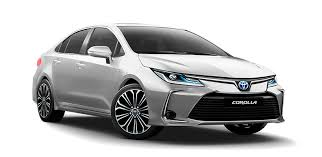
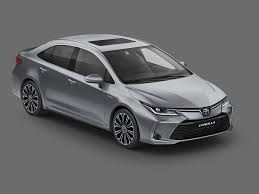
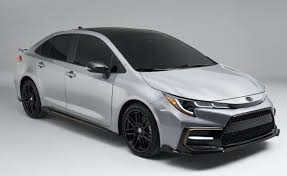
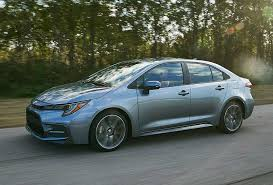

In [172]:
    links = []
    for small_imag in small_imgs_lists:
        try:
            small_imag.click()
            time.sleep(3)
            link = driver.find_elements_by_css_selector('img.n3VNCb')[1].get_attribute('src')
            print(link)
            links.append(link)
        except:
            pass
    links = [x for x in links if 'http' == x[:4]]

In [175]:
links

['https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-blanco_4.png',
 'https://fotos.perfil.com/2020/10/02/trim/1280/720/toyota-corolla-gr-sport-1053648.jpg',
 'https://s3.amazonaws.com/wp.prod.neoauto.pe/noticias/wp-content/uploads/2020/06/30222915/toyota-corolla-2021-lanzamiento-peru.jpg',
 'https://i.ytimg.com/vi/GKev2DWcDL8/maxresdefault.jpg',
 'https://cnet4.cbsistatic.com/img/UJ3mxFRgZCL_5PyM5iJSM-p0WWc=/2019/07/17/e6640571-f94c-47d6-b026-a69dec844b29/toyota-corolla-2020.jpg',
 'https://acs2.blob.core.windows.net/imgcatalogo/xl/VA_efb2f80f9a764a878852f620cf870871.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f1/2018_Toyota_Corolla_%28MZEA12R%29_Ascent_Sport_hatchback_%282018-11-02%29_01.jpg',
 'https://lh3.googleusercontent.com/proxy/2aWpc5XArjWkU0h8NPufXm5xN26_IJYb46yI_dkSV-TxkTUm-F8QVw4nBfMIzanntc8f17LKfJPvpNmKGINehf7j4bdUiAHRXPXTQya5IaiYFb786j2fBY4DJmgMt6M3jQodO8ieSiE44y_tccp76Q',
 'https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-negro_0.

## Recuperar imágenes de Google Imagenes (solo snippets pequeños)

In [176]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [192]:
links_1 = fetch_image_urls(query='motito peruana en cusco', max_links_to_fetch=200, wd=driver, sleep_between_interactions=0.2)

Found: 100 search results. Extracting links from 0:100
Found: 85 image links, looking for more ...


In [189]:
dict_links = {}
for word_searched in ['hatchback','pick up', 'peru','llanta dañada']:
    print(word_searched)
    links_1 = fetch_image_urls(query=word_searched, max_links_to_fetch=100, wd=driver, sleep_between_interactions=3)
    links_1 = [x for x in links_1]
    dict_links[word_searched] = links_1
    


hatchback
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
pick up
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
peru
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
llanta dañada
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!


In [191]:
    with open(f'imagenes_google_cars.json', 'w') as fp:
        json.dump(dict_links, fp)

['https://www.toyotaperu.com.pe/sites/default/files/360/yarishb_blanco040_03.jpg',
 'https://www.carroya.com/noticias/sites/default/files/kia-hatchback.jpg',
 'http://cdn2.dineroenimagen.com/media/dinero/styles/xlarge/public/images/2018/11/sedan-hatchback-diferencia.jpg']